# The plots and statistics I will use in my presentation

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [66]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [67]:
white_wine=white_wine_original.copy()
red_wine=red_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine_to_concat=white_wine.copy()
white_wine_to_concat['color']='white wine'
red_wine_to_concat=red_wine.copy()
red_wine_to_concat['color']='red wine'

frames = [red_wine_to_concat, white_wine_to_concat]


wines = pd.concat(frames)


In [68]:
sns.set_context('talk', font_scale=1)
plt.style.use("dark_background")

<Axes: >

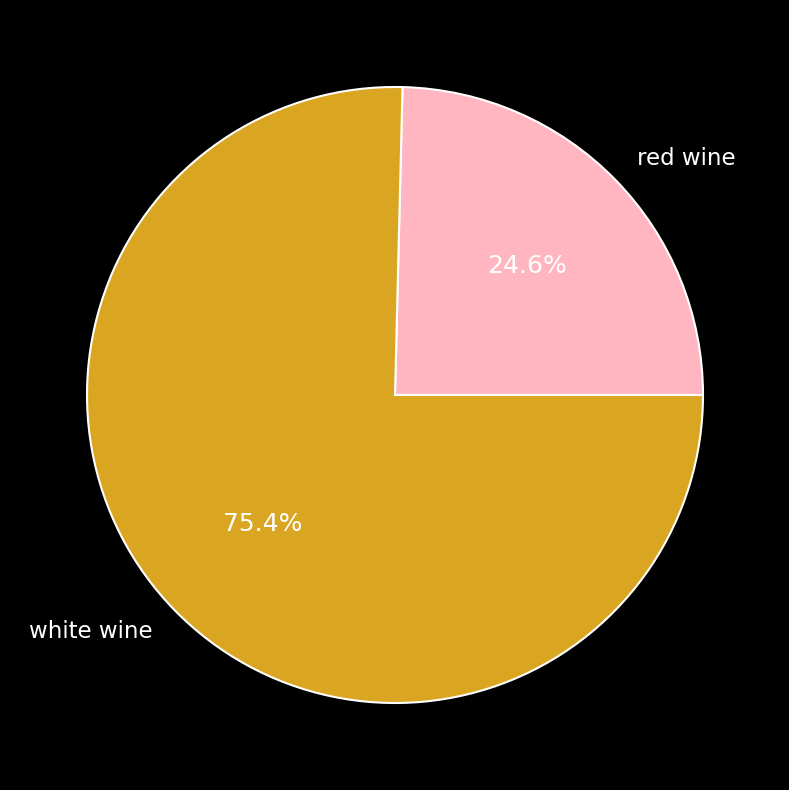

In [69]:
colors = {'red':'blue', 'white':'beige'}
wines.groupby('color').size().plot(kind='pie', autopct='%.1f%%', colors=['lightpink', 'goldenrod'])
  

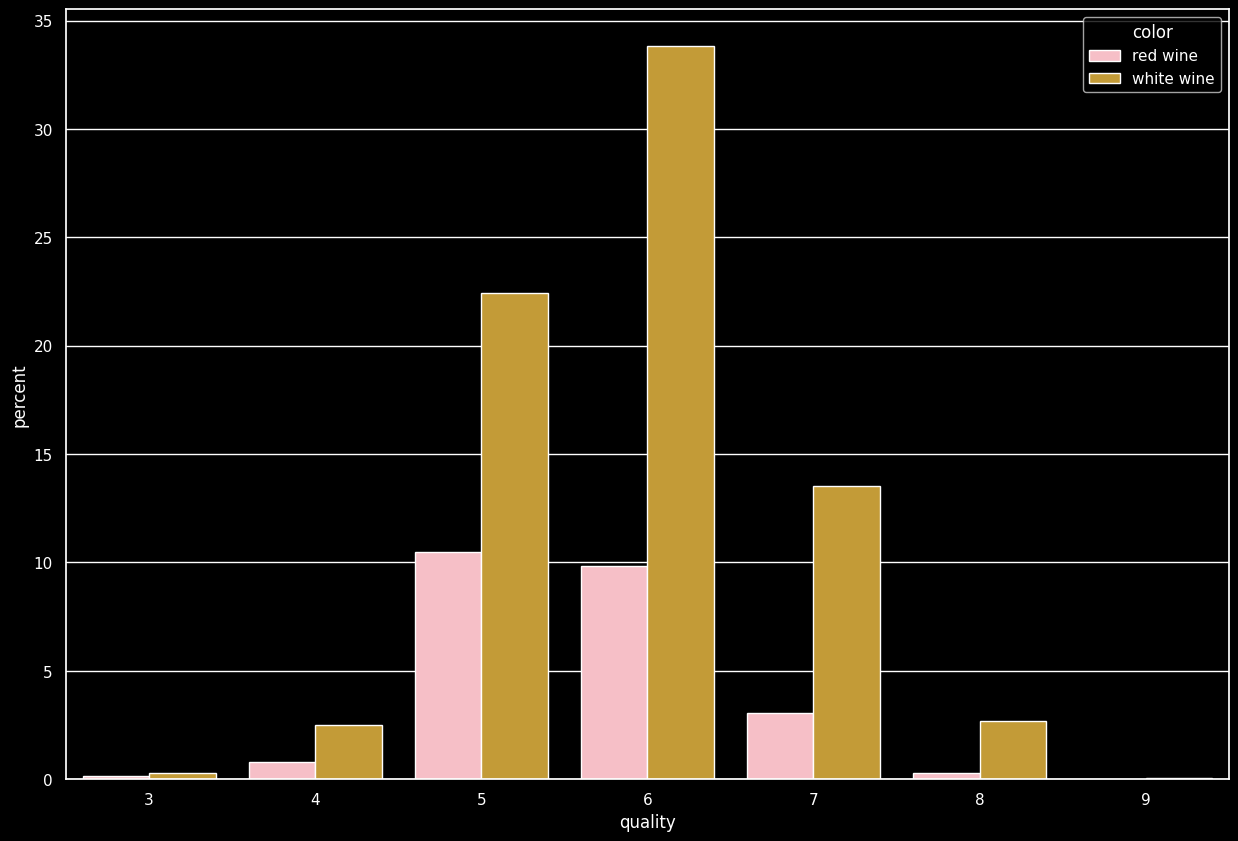

In [78]:
sns.countplot(x='quality',hue='color', data=wines, palette=['lightpink', 'goldenrod'],stat="percent")
# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")

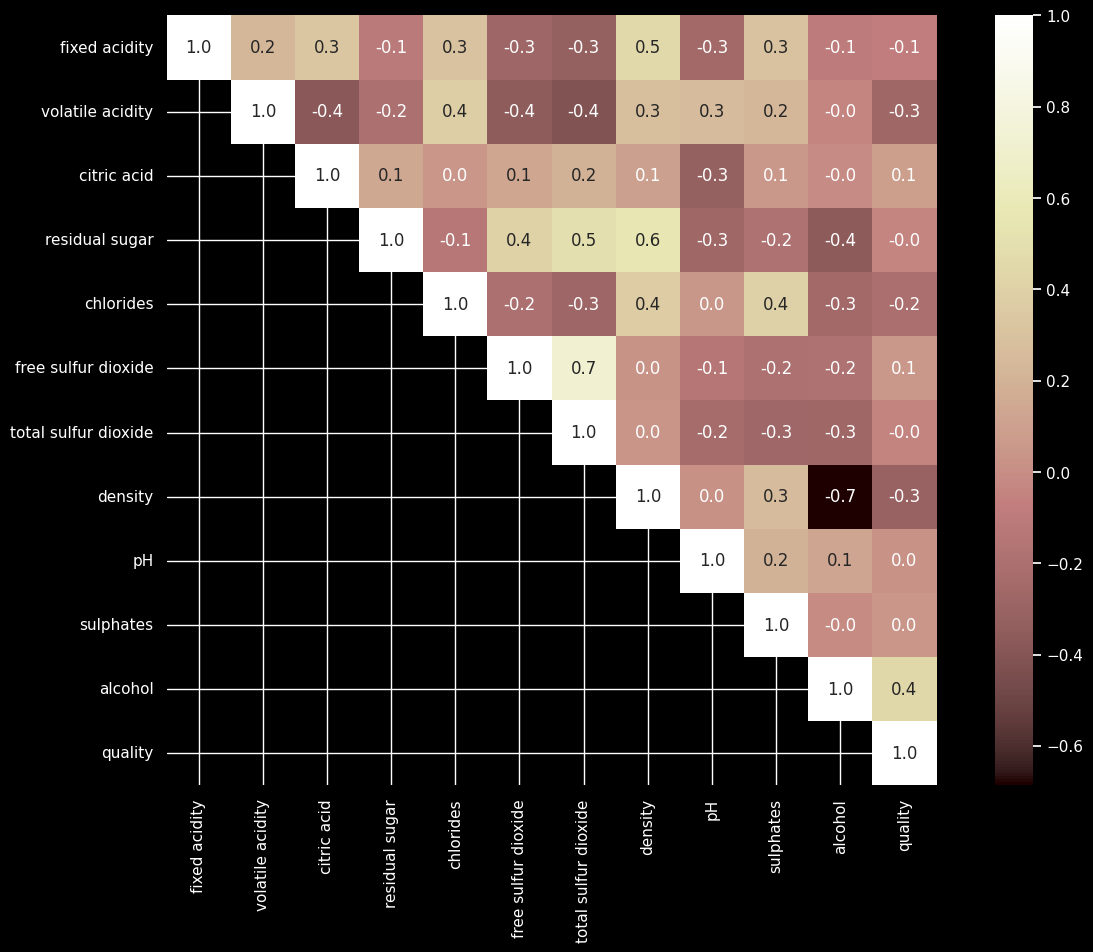

In [95]:
if 'quality_label' in wines:
    wine_mx=wines.drop(columns=['quality_label', 'color'])

wines_mx=wine_mx.corr()
plt.style.use("dark_background")


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask-1,
  cmap='pink')



sns.set(rc = {'figure.figsize':(15,10)})


Text(0.5, 1.0, 'Volatile Acidity / Quality')

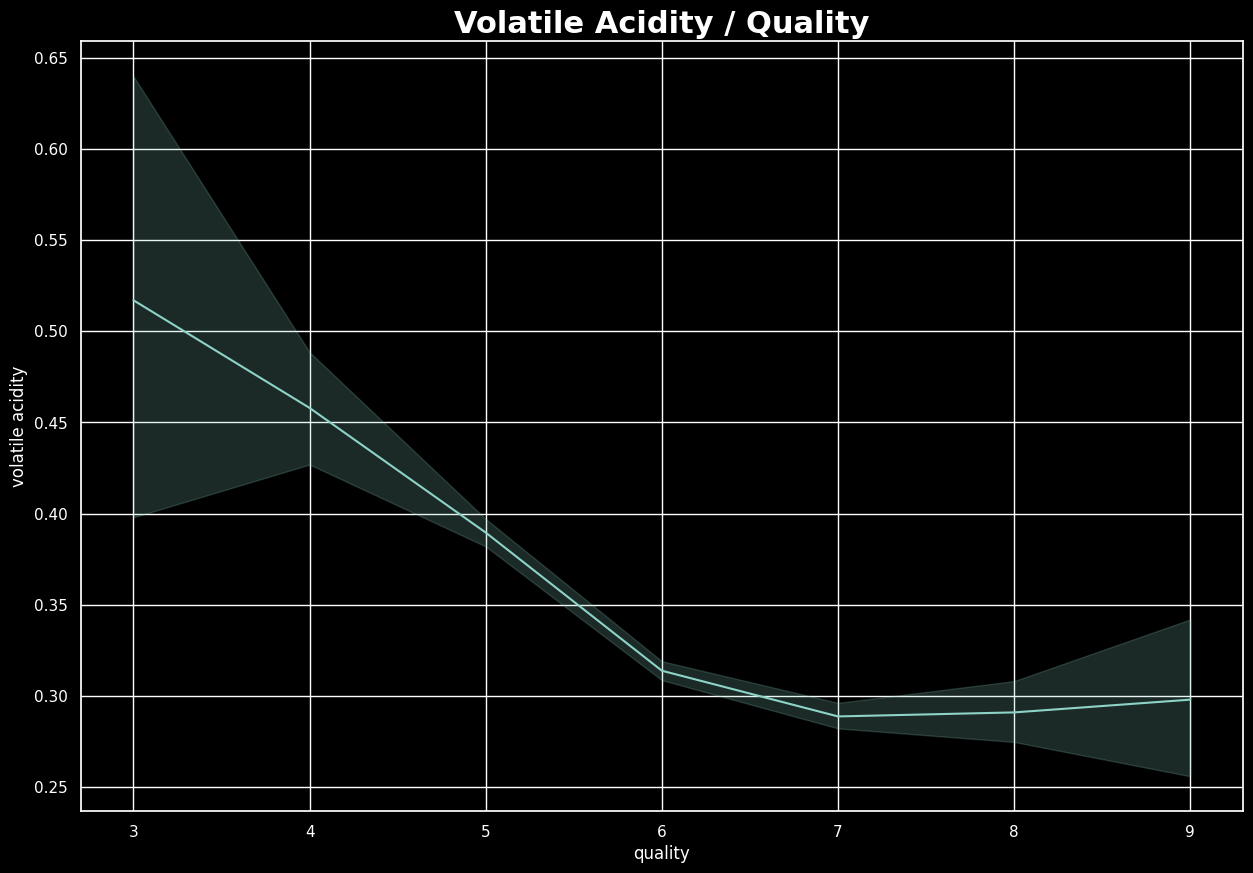

In [108]:
sns.lineplot(x='quality',y='volatile acidity' , data=wines)
# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")
plt.title('Volatile Acidity / Quality', fontweight ='bold', fontsize='22')


/tmp/ipykernel_20955/548514853.py:1: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='quality', data=white_wine, palette=[ 'goldenrod'],stat="percent", hue='quality', legend=False)


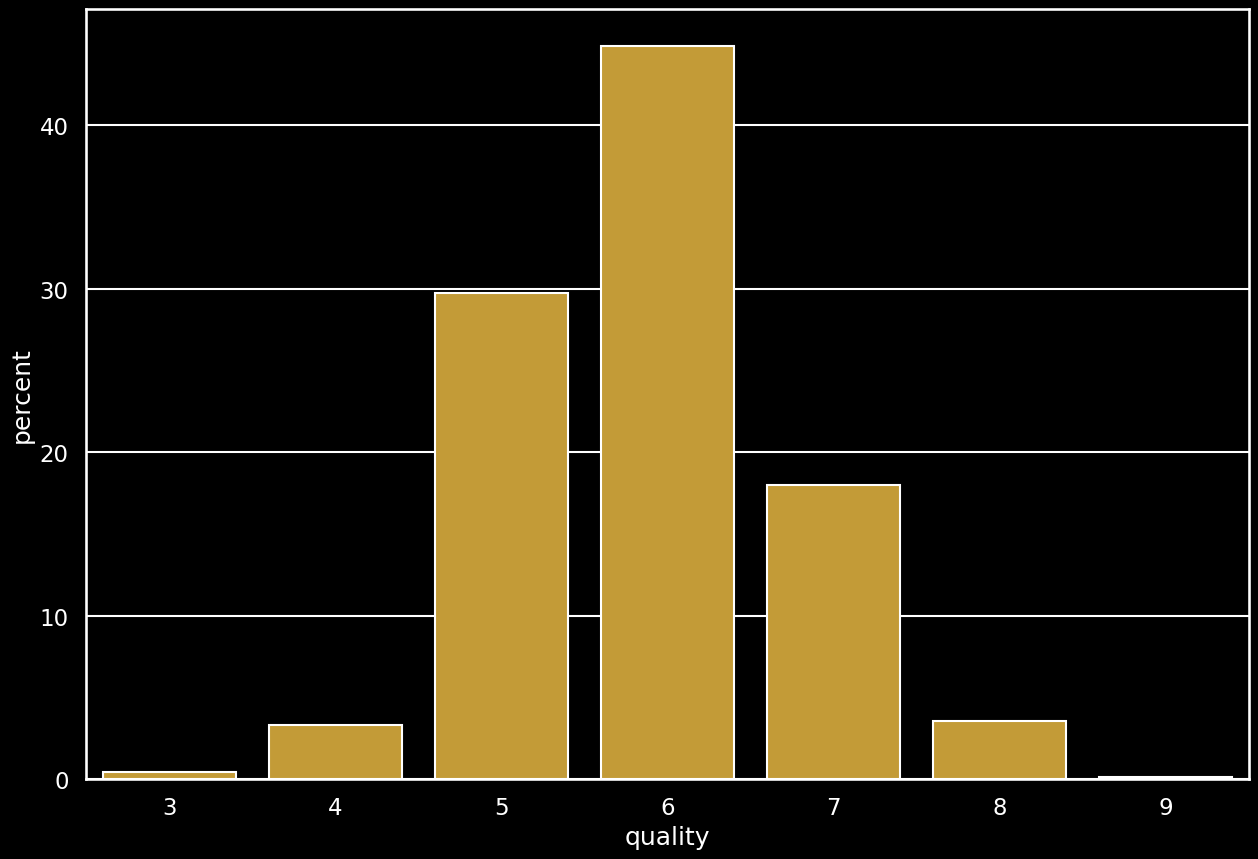

In [73]:
sns.countplot(x='quality', data=white_wine, palette=[ 'goldenrod'],stat="percent", hue='quality', legend=False)
# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")

/tmp/ipykernel_20955/4075811909.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=red_wine, palette=[ 'lightpink'],stat="percent")
/tmp/ipykernel_20955/4075811909.py:1: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='quality', data=red_wine, palette=[ 'lightpink'],stat="percent")


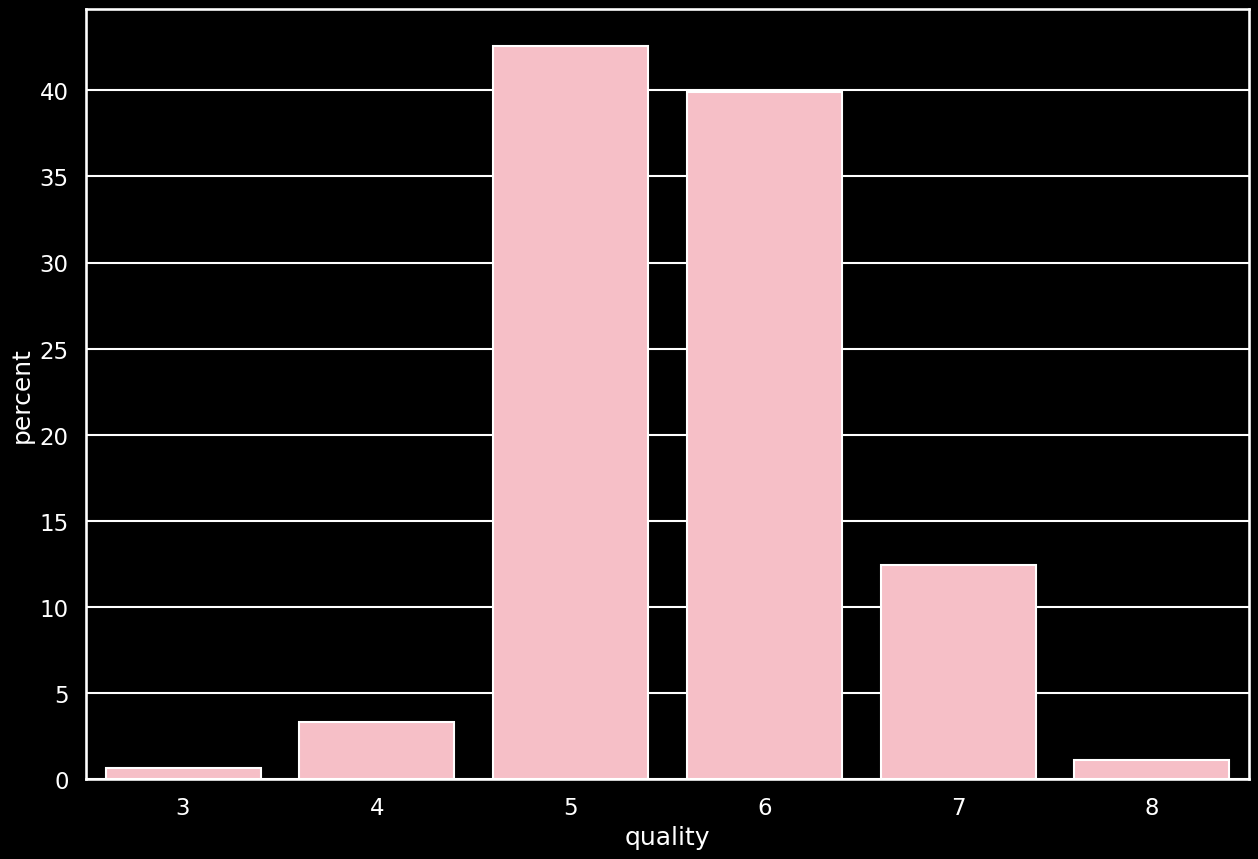

In [72]:
sns.countplot(x='quality', data=red_wine, palette=[ 'lightpink'],stat="percent")
# estimator by default based on mean, can be changed to: median, np.var (variance), np.std...
plt.style.use("dark_background")